## Compare Abbott Labs & Pfizer

In [7]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import LinearRegressionModel
from darts.models import NBEATSModel

In [8]:
# Read a pandas DataFrame
df = pd.read_csv("/home/becode/Desktop/Time Series/venv/scr/data/yfin_AdjClose.csv", delimiter=",", index_col='Date',
                  parse_dates = ['Date'] )
df = df[df.index > '01-01-2015']
df.index= pd.to_datetime(df.index , unit='D')
ser = df['ABT']
r = ser.resample("W").sum()
ser1 = df['PFE']
r1 = ser1.resample("W").sum()
series = TimeSeries.from_series(r, fill_missing_dates=True, freq=None)
series1 = TimeSeries.from_series(r1, fill_missing_dates=True, freq=None)
train_air, val_air = series[:160], series[160:]
train_milk, val_milk = series1[:160], series1[160:]

Display Train & Test datasets for Abbott Labs & Pfizer

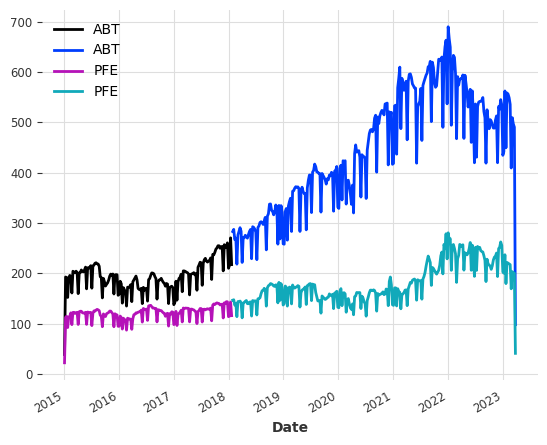

In [9]:
train_air.plot()
val_air.plot()
train_milk.plot()
val_milk.plot()

Scale the data<br>
Display Train Scaled datasets for Abbott Labs & Pfizer

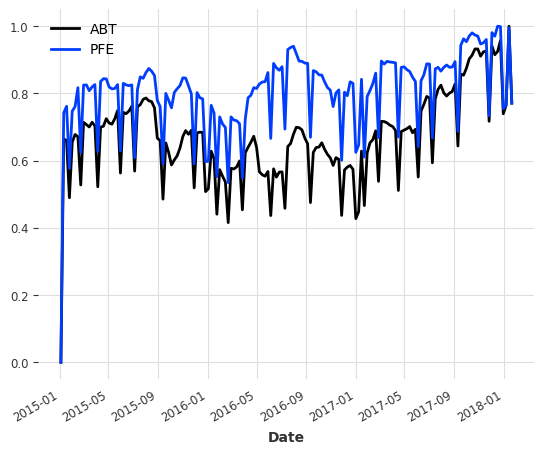

In [10]:
scaler = Scaler()
train_air_scaled, train_milk_scaled = scaler.fit_transform([train_air, train_milk])

train_air_scaled.plot()
train_milk_scaled.plot()

Use LinearRegressionModel to predict future values for Abbott Labs & Pfizer

In [11]:

model = LinearRegressionModel(lags=3, output_chunk_length=2)
model.fit(train_air_scaled)
model.predict(6, val_air)

model.fit(train_air_scaled)
model.predict(6, val_air)

<TimeSeries (DataArray) (Date: 6, component: 1, sample: 1)>
array([[[278.98599299]],

       [[270.9706879 ]],

       [[189.30467616]],

       [[195.23707076]],

       [[186.44185587]],

       [[171.2291499 ]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2023-04-02 2023-04-09 ... 2023-05-07
  * component  (component) object 'ABT'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

Darts Neural NBEATSModel to predict future values for Abbott Labs - Pfizer

In [12]:
# init
model = NBEATSModel(input_chunk_length=14, 
                    output_chunk_length=6)
# fit on two series
model.fit([train_air_scaled, train_milk_scaled])                              
forecast = model.predict(series=[val_air, val_milk], n=36)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.1 M 
---------------------------------------------------
6.1 M     Trainable params
1.4 K     Non-trainable params
6.1 M     Total params
24.469    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

### Display the first predicted value from the model for Abbott Labs

In [20]:
print('NBEATSModel_forecast' , forecast[0][0])

NBEATSModel_forecast <TimeSeries (DataArray) (Date: 1, component: 1, sample: 1)>
array([[[421.45811484]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2023-04-02
  * component  (component) object 'ABT'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


### Display the first predicted value from the model for Pfizer

In [24]:
print('NBEATSModel_forecast' , forecast[1][0])

NBEATSModel_forecast <TimeSeries (DataArray) (Date: 1, component: 1, sample: 1)>
array([[[176.33076348]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2023-04-02
  * component  (component) object 'PFE'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
